In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
kot_df = pd.read_csv('kotkin_comments.csv')
sto_df = pd.read_csv('stone_comments.csv')
import functools as f

In [2]:
kot_df.rename({'0':'comments'}, axis=1, inplace=True)

In [3]:
sto_df.rename({'0':'comments'}, axis=1, inplace = True)


In [4]:
#Data exploration and high level data analysis

In [5]:
kot_df.dtypes

Unnamed: 0     int64
comments      object
dtype: object

In [6]:
kot_df['polarity'] = kot_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[0])
kot_df['subjectivity'] = kot_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[1])
sto_df['polarity'] = sto_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[0])
sto_df['subjectivity'] = sto_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[1])

In [7]:
sto_df[sto_df['polarity']>=0.5]

,Unnamed: 0,comments,polarity,subjectivity
6,6,"Thank you Lex, great episode as always.",0.8000,0.750
8,8,I am honestly disturbed buy this level of spin...,0.7000,0.825
9,9,"This was very interesting to listen to, thank ...",0.8125,0.650
15,15,You are truly a great person Lex,0.8000,0.750
17,17,"This was brilliant. Thanks, Lex",0.5500,0.600
...,...,...,...,...
835,835,Its really interesting how Stone repeatedly sp...,0.5000,0.500
859,859,Oliver paints Putin as a great sensible person...,0.7500,0.825
867,867,Oliver Stone must be living in his own world a...,0.6000,1.000
889,889,After him saying that Putins idea is to keep w...,0.6000,0.900


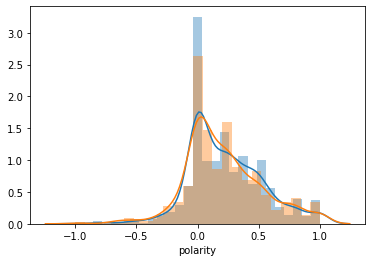

In [8]:
sns.distplot(kot_df['polarity'])
sns.distplot(sto_df['polarity'])
#fig, ax = plt.subplots(1, 2, figsize=(15,6))

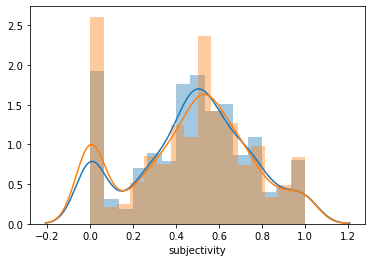

In [9]:
sns.distplot(sto_df['subjectivity'])
sns.distplot(kot_df['subjectivity'])

In [10]:
#The distribution are fairly similar

In [11]:
print(len(sto_df))
print(len(kot_df))

895
1399


In [12]:
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
kot_df[kot_df['Unnamed: 0']==1388].comments

1388    1:18:00 ya buddy I notice you didn't include t...
Name: comments, dtype: object

In [13]:
def label_assig(val): 
    if val == 0: 
        return 'neutral'
    elif val < 0: 
        return 'neg'
    elif val > 0: 
        return 'pos'
kot_df['label'] = kot_df['polarity'].apply(label_assig)
sto_df['label'] = sto_df['polarity'].apply(label_assig)

In [14]:
sto_df

,Unnamed: 0,comments,polarity,subjectivity,label
0,0,Here are the timestamps. Please check out our ...,0.085714,0.557143,pos
1,1,“When exposing a crime is treated as committin...,0.000000,0.000000,neutral
2,2,I never felt inclined to and never bothered le...,0.342857,0.721429,pos
3,3,"Oliver Stone, please protect the man for the f...",0.158333,0.375000,pos
4,4,This is an outstanding interview such nice dia...,0.431714,0.842143,pos
...,...,...,...,...,...
890,890,Liked and subscribed. Thanks for sharing.,0.400000,0.500000,pos
891,891,"При просмотре иногда хотелось сказать ‘Лекс, х...",0.000000,0.000000,neutral
892,892,It was a bad idea to jump out of an airplane w...,-0.700000,0.666667,neg
893,893,It's refreshing to hear Lex interviews with so...,0.228125,0.509375,pos


In [15]:
#Let's put the two datasets togheter, and plot them out
kot_df['video'] = 'Kotkin'
sto_df['video'] = 'Stone'
df = pd.concat([kot_df, sto_df],axis=0).reset_index()

In [16]:
df

,index,Unnamed: 0,comments,polarity,subjectivity,label,video
0,0,0,Here are the timestamps. Please check out our ...,0.216667,0.377778,pos,Kotkin
1,1,1,I think this complement could be taken the wro...,0.242857,0.714286,pos,Kotkin
2,2,2,It took me 11 hours to do the math but he said...,0.187500,0.437500,pos,Kotkin
3,3,3,I love Stephen Kotkin. One of my fav historian...,0.300000,0.500000,pos,Kotkin
4,4,4,This interview was a certified classic!,0.208333,0.166667,pos,Kotkin
...,...,...,...,...,...,...,...
2289,890,890,Liked and subscribed. Thanks for sharing.,0.400000,0.500000,pos,Stone
2290,891,891,"При просмотре иногда хотелось сказать ‘Лекс, х...",0.000000,0.000000,neutral,Stone
2291,892,892,It was a bad idea to jump out of an airplane w...,-0.700000,0.666667,neg,Stone
2292,893,893,It's refreshing to hear Lex interviews with so...,0.228125,0.509375,pos,Stone


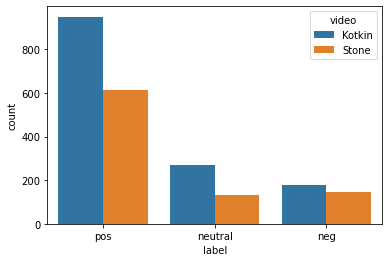

In [17]:
sns.countplot(data=df, x='label', hue='video')

In [18]:
#We see there is less positive sentiment in the Stone video, people seem to disagree with his views/takes
#Let's create a table to see proportion of positive vs negative vs neutral. 

In [19]:
df.groupby(df[df['video']=='Kotkin']['label']).count()

,index,Unnamed: 0,comments,polarity,subjectivity,label,video
label,,,,,,,
neg,178,178,178,178,178,178,178
neutral,271,271,269,271,271,271,271
pos,950,950,950,950,950,950,950


In [20]:
len_kot = len(df[df['video']=='Kotkin'])
len_sto = len(df[df['video']=='Stone'])
prop_neg_kot = round(len(df.loc[(df['video']=='Kotkin') & (df['label']=='neg')])/len_kot, 4)*100
prop_pos_kot = round(len(df.loc[(df['video']=='Kotkin') & (df['label']=='pos')])/len_kot,4 )*100
prop_neu_kot = round(len(df.loc[(df['video']=='Kotkin') & (df['label']=='neutral')])/len_kot,4 )*100
prop_neg_sto = round(len(df.loc[(df['video']=='Stone') & (df['label']=='neg')])/len_sto, 4)*100
prop_pos_sto = round(len(df.loc[(df['video']=='Stone') & (df['label']=='pos')])/len_sto, 4)*100
prop_neu_sto = round(len(df.loc[(df['video']=='Stone') & (df['label']=='neutral')])/len_kot, 4)*100

In [21]:
Kotkin = [prop_neg_kot, prop_pos_kot, prop_neu_kot]
Stone = [prop_neg_sto, prop_pos_sto, prop_neu_kot]
index = ['Negative', 'Positive', 'Neutral']
cols = ['Kotkin','Stone','Index']
list_of_tuples = list(zip(Kotkin, Stone, index))

In [22]:
proportion = pd.DataFrame(list_of_tuples, columns=cols)

In [23]:
proportion.set_index('Index', inplace=True)

In [24]:
proportion

,Kotkin,Stone
Index,,
Negative,12.72,16.42
Positive,67.91,68.72
Neutral,19.37,19.37


In [25]:
#The proportions are similar, percentage wise

In [26]:
#Let's use LDA to extract main topics

In [27]:
#Preprocess data
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
lemmatizer = WordNetLemmatizer()
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    #print(nopunc)
    lemmatizer.lemmatize("better", pos ="a")

    # Now just remove any stopwords
    stop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #lemmatize data
    lemma = []
    for lem in stop: 
        lemma.append(lemmatizer.lemmatize(lem))
    return lemma

text_process('Hello, my name is: Kamen I was very very better')

['Hello', 'name', 'Kamen', 'better']

In [29]:
df = df.applymap(str)

In [30]:
df['pro_comments'] = df.comments.apply(text_process)

In [31]:
df.head()

,index,Unnamed: 0,comments,polarity,subjectivity,label,video,pro_comments
0,0,0,Here are the timestamps. Please check out our ...,0.21666666666666667,0.37777777777777777,pos,Kotkin,"[timestamps, Please, check, sponsor, support, ..."
1,1,1,I think this complement could be taken the wro...,0.24285714285714288,0.7142857142857143,pos,Kotkin,"[think, complement, could, taken, wrong, way, ..."
2,2,2,It took me 11 hours to do the math but he said...,0.1875,0.4375,pos,Kotkin,"[took, 11, hour, math, said, “Lex”, guest, com..."
3,3,3,I love Stephen Kotkin. One of my fav historian...,0.3,0.5,pos,Kotkin,"[love, Stephen, Kotkin, One, fav, historian, m..."
4,4,4,This interview was a certified classic!,0.20833333333333331,0.16666666666666666,pos,Kotkin,"[interview, certified, classic]"


In [32]:
#Let's create a Bag of Words
import gensim
from gensim import corpora
dictionary = gensim.corpora.Dictionary(df['pro_comments'])

In [33]:
print(dictionary)

Dictionary(10476 unique tokens: ['000', '1', '12635', '1309', '13433']...)


In [34]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['pro_comments']]

In [35]:
print(bow_corpus[0][0][1])

1


In [36]:
print(df['pro_comments'][5])
print(df['pro_comments'][1][0])

['One', 'favorite', 'guest', 'you’ve', 'previously', 'Looking', 'forward', 'listening', 'one', 'Thanks', 'great', 'content', 'Lex']
think


In [37]:
bow_corpus[5]

[(72, 1),
 (85, 1),
 (106, 1),
 (116, 1),
 (117, 1),
 (118, 1),
 (119, 1),
 (120, 1),
 (121, 1),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1)]

In [38]:
n=0
for i in range(len(bow_corpus)): 
    for j in range(len(bow_corpus[i])): 
        if bow_corpus[i][j][1] == 3: 
            n+=1
            break

word:  Putin
Here are the timestamps. Please check out our sponsors to support this podcast.
0:00 - Introduction & sponsor mentions:
- Lambda: https://lambdalabs.com/lex
- Scale: https://scale.com/lex
- Athletic Greens: https://athleticgreens.com/lex and use code LEX to get 1 month of fish oil
- ExpressVPN: https://expressvpn.com/lexpod and use code LexPod to get 3 months free
- ROKA: https://roka.com/ and use code LEX to get 20% off your first order
2:19 - Putin and Stalin
13:09 - Putin vs the West
36:01 - Response to Oliver Stone
47:07 - Russian invasion of Ukraine
1:26:35 - Putin's plan for the war
1:34:33 - Henry Kissinger
1:40:28 - Nuclear war
1:51:01 - Parallels to World War II
2:13:47 - China
2:21:55 - World War III
2:29:24 - Navalny
2:33:41 - Meaning of life
word:  conversation
This was a great conversation. I enjoyed it. Your guest is very knowledgeable and I appreciated your ability as an interviewer to listen objectively. My only critique comes early in the conversation duri

In [47]:
#Running the LDA model
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dictionary,                                    
                                   passes = 100,
                                   workers = 2)

In [46]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.009*"Russia" + 0.005*"people" + 0.005*"Ukraine" + 0.005*"war" + 0.004*"interview" + 0.004*"would" + 0.004*"like" + 0.004*"US" + 0.004*"Putin" + 0.004*"one"
Topic: 1 
Words: 0.016*"Lex" + 0.013*"Stone" + 0.011*"interview" + 0.009*"Oliver" + 0.006*"like" + 0.006*"Kotkin" + 0.006*"Putin" + 0.006*"Russia" + 0.005*"Thank" + 0.005*"great"
